In [1]:
import numpy as np
import pandas as pd
import util
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense, Input

data_path = "../data/"

In [2]:
def split_data(df, train_ratio=0.8):
    # Ensure the ratio is less than 1
    assert train_ratio < 1, "Ratio must be less than 1"

    # Calculate the number of rows for the training set
    train_rows = int(df.shape[0] * train_ratio)

    # Split the dataframe
    train_df = df.iloc[:train_rows]
    test_df = df.iloc[train_rows:]

    # Split the dataframes into X and y
    y_train = train_df.iloc[:, 0]
    X_train = train_df.iloc[:, 1:]
    y_test = test_df.iloc[:, 0]
    X_test = test_df.iloc[:, 1:]

    return y_train, X_train, y_test, X_test

def train_lstm_model(X, y, epochs=100, batch_size=32):
    model = Sequential()
    model.add(Input(shape=(X.shape[1], 1)))  # Use Input layer to define input shape
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='sigmoid'))  # Use sigmoid activation for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy')  # Use binary crossentropy for binary classification
    model.fit(X, y, epochs=epochs, batch_size=batch_size)
    return model

In [15]:
btc = pd.read_csv(data_path+'bitcoin_return_w_feature.csv',encoding = "utf-8-sig", index_col=0)
btc
ew = pd.read_csv(data_path+'equal_weighting_w_feature.csv',encoding = "utf-8-sig", index_col=0)
ew
# btc = pd.read_csv(data_path+'bitcoin_return_w_feature.csv',encoding = "utf-8-sig", index_col=0)
# btc
# btc = pd.read_csv(data_path+'bitcoin_return_w_feature.csv',encoding = "utf-8-sig", index_col=0)
# btc
# btc = pd.read_csv(data_path+'bitcoin_return_w_feature.csv',encoding = "utf-8-sig", index_col=0)
# btc
# btc = pd.read_csv(data_path+'bitcoin_return_w_feature.csv',encoding = "utf-8-sig", index_col=0)
# btc

,log_return,sum_return_1d,mean_return_1d,min_return_1d,max_return_1d,value_1d_ago,sum_return_2d,mean_return_2d,min_return_2d,max_return_2d,...,sum_return_364d,mean_return_364d,min_return_364d,max_return_364d,value_364d_ago,sum_return_365d,mean_return_365d,min_return_365d,max_return_365d,value_365d_ago
date,,,,,,,,,,,,,,,,,,,,,
2015-03-10 00:00:00+00:00,0.027013,0.027013,0.027013,0.027013,0.027013,0.014319,0.041332,0.020666,0.014319,0.027013,...,-2.312419,-0.006353,-0.260875,0.290826,0.018081,-2.294339,-0.006286,-0.260875,0.290826,0.090711
2015-03-11 00:00:00+00:00,-0.003294,-0.003294,-0.003294,-0.003294,-0.003294,0.027013,0.023719,0.011859,-0.003294,0.027013,...,-2.233897,-0.006137,-0.260875,0.290826,-0.081816,-2.315714,-0.006344,-0.260875,0.290826,0.018081
2015-03-12 00:00:00+00:00,-0.000175,-0.000175,-0.000175,-0.000175,-0.000175,-0.003294,-0.003469,-0.001735,-0.003294,-0.000175,...,-2.244176,-0.006165,-0.260875,0.290826,0.010104,-2.234072,-0.006121,-0.260875,0.290826,-0.081816
2015-03-13 00:00:00+00:00,-0.008244,-0.008244,-0.008244,-0.008244,-0.008244,-0.000175,-0.008419,-0.004209,-0.008244,-0.000175,...,-2.248610,-0.006178,-0.260875,0.290826,-0.003810,-2.252420,-0.006171,-0.260875,0.290826,0.010104
2015-03-14 00:00:00+00:00,-0.024459,-0.024459,-0.024459,-0.024459,-0.024459,-0.008244,-0.032703,-0.016351,-0.024459,-0.008244,...,-2.336412,-0.006419,-0.260875,0.290826,0.063343,-2.273069,-0.006228,-0.260875,0.290826,-0.003810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-17 00:00:00+00:00,-0.039909,-0.039909,-0.039909,-0.039909,-0.039909,0.007244,-0.032665,-0.016332,-0.039909,0.007244,...,1.796506,0.004935,-0.079212,0.057210,-0.005506,1.791000,0.004907,-0.079212,0.057210,0.044170
2024-03-18 00:00:00+00:00,0.009238,0.009238,0.009238,0.009238,0.009238,-0.039909,-0.030671,-0.015335,-0.039909,0.009238,...,1.811001,0.004975,-0.079212,0.057210,-0.005257,1.805744,0.004947,-0.079212,0.057210,-0.005506
2024-03-19 00:00:00+00:00,-0.070680,-0.070680,-0.070680,-0.070680,-0.070680,0.009238,-0.061442,-0.030721,-0.070680,0.009238,...,1.741601,0.004785,-0.079212,0.057210,-0.001280,1.740321,0.004768,-0.079212,0.057210,-0.005257


In [16]:
y_train, X_train, y_test, X_test = split_data(ew, train_ratio=0.7)
y_train_bin = util.binarize_y(y_train)
y_test_bin = util.binarize_y(y_test)
model = train_lstm_model(X_train, y_train_bin, epochs=100, batch_size=32)
predictions = model.predict(X_test)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 221s 3s/step - loss: 0.5303
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 214s 3s/step - loss: 0.4191
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 228s 3s/step - loss: 0.4054
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 230s 3s/step - loss: 0.3976
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 233s 3s/step - loss: 0.4255
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 239s 3s/step - loss: 0.4287
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 265s 4s/step - loss: 0.4139
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 243s 3s/step - loss: 0.4033
Epoch 9/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step - loss: 0.3661
Epoch 10/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 241s 3s/step - loss: 0.4226
Epoch 11/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 237s 3s/step - loss: 0.4462
Epoch 12/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 238s 3s/step - loss: 0.3564
Epoch 13/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 238s 3s/step - loss: 0.4077
Epoch 14/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 238s 3s/step - loss: 0.3799
Epoch 15/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 232s 3s/step - lo

In [17]:
predictions
predictions_classified_LSTM  = (predictions > 0.5).astype(int) * 2 -1
# predictions_classified_LSTM

In [18]:
def calculate_cumulative_log_return(df):
    # This function calculates the cumulative sum of log returns.
    # This is done by cumulatively summing up the daily log returns.
    cumulative_log_return = df['log_return'].cumsum()
    
    return cumulative_log_return
    
# Assume a risk-free rate of 2% per annum and 252 trading days in a year
risk_free_rate = util.calculate_daily_risk_free_log_return(0.02, 252)

# Assume a beta of 1 for both y_test and y_pred
beta = 1

y_pred = y_test * predictions_classified_LSTM.reshape(-1)
# Calculate performance metrics for y_test
sharpe_ratio_test = util.calculate_sharpe_ratio(y_test, risk_free_rate)
treynor_ratio_test = util.calculate_treynor_ratio(y_test, risk_free_rate, beta)
jensens_alpha_test = util.calculate_jensens_alpha(y_test, y_test, risk_free_rate, beta)  # Here we use y_test as the market returns

# Calculate performance metrics for y_pred
sharpe_ratio_pred = util.calculate_sharpe_ratio(y_pred, risk_free_rate)
treynor_ratio_pred = util.calculate_treynor_ratio(y_pred, risk_free_rate, beta)
jensens_alpha_pred = util.calculate_jensens_alpha(y_pred, y_test, risk_free_rate, beta)  # Here we use y_test as the market returns

print(f"Performance metrics for y_test:\nSharpe Ratio: {sharpe_ratio_test}\nTreynor Ratio: {treynor_ratio_test}\nJensen's Alpha: {jensens_alpha_test}")
print(f"\nPerformance metrics for y_pred:\nSharpe Ratio: {sharpe_ratio_pred}\nTreynor Ratio: {treynor_ratio_pred}\nJensen's Alpha: {jensens_alpha_pred}")

Performance metrics for y_test:
Sharpe Ratio: 0.21551706438758952
Treynor Ratio: 0.0055613504912273215
Jensen's Alpha: 1.0190063032119917e-21

Performance metrics for y_pred:
Sharpe Ratio: -0.22166803445552638
Treynor Ratio: -0.005720074351474999
Jensen's Alpha: -0.01128142484270232


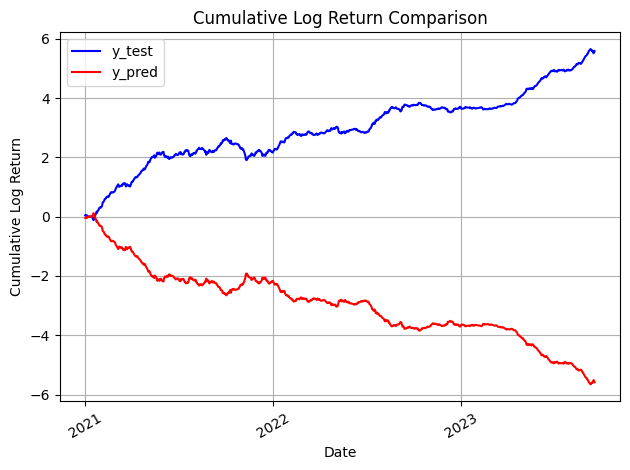

In [19]:
# Calculate the cumulative log return for both y_test and y_pred
cum_y_test = calculate_cumulative_log_return(pd.DataFrame(y_test, columns=['log_return']))
cum_y_pred = calculate_cumulative_log_return(pd.DataFrame(y_pred, columns=['log_return']))

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the cumulative log return of y_test with a blue line
ax.plot(cum_y_test.index, cum_y_test, color='blue', linestyle='-')

# Plot the cumulative log return of y_pred with a red line
ax.plot(cum_y_pred.index, cum_y_pred, color='red', linestyle='-')

# Set the title and labels
ax.set_title('Cumulative Log Return Comparison')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Log Return')

# Get the years from the index
years = [date.year for date in pd.to_datetime(cum_y_test.index)]

# Set the x-ticks to display years
ax.set_xticks(cum_y_test.index[::365])  # Assuming 365 days in a year
ax.set_xticklabels(years[::365], rotation=30)  # Rotate labels by 30 degrees

# Enable the grid
ax.grid(True)

# Add a legend
ax.legend(['y_test', 'y_pred'])
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
df_out = pd.DataFrame({
    'predictions_classified': predictions_classified_LSTM.flatten(),
    'predictions': predictions.flatten(),
    'date': y_test.index,
    'actuals': y_test.values
})

# Write the DataFrame to a CSV file
df_out.to_csv('predictions_ew.csv',encoding = "utf-8-sig", index=1)